In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#Uses Jupyter's own backend to plot
%matplotlib inline

**Show all rows**

In [2]:
#Show all rows and columns
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)

#To do - questions to answer

Get to know the dataset
 - ~~Initial visualization~~
 - ~~Change column titles~~

Data cleaning
 - Change all NAN to numerical values 
     - Number of employees
     - Is your employer primarily a tech company/organization?
     - Gender
         - ~~Change gender to male, female, other~~
         - ~~Encode gender~~
         - ~~Visualize % of gender and age in each country~~
     - Mental health disorder columns
         - ~~Anxiety Disorder (Generalized, Social, Phobia, etc)~~
         - ~~Mood Disorder (Depression, Bipolar Disorder, etc)~~
         - ~~Psychotic Disorder (Schizophrenia, Schizoaffective, etc)~~
         - ~~Eating Disorder (Anorexia, Bulimia, etc)~~
         - ~~Attention Deficit Hyperactivity Disorder~~
         - ~~Personality Disorder (Borderline, Antisocial, Paranoid, etc)~~
         - ~~Obsessive-Compulsive Disorder~~
         - ~~Post-Traumatic Stress Disorder~~
         - ~~Stress Response Syndromes~~
         - ~~Dissociative Disorder~~
         - ~~Substance Use Disorder~~
         - ~~Addictive Disorder~~
         - Make columns:
             - "If possibly, what disorder(s) do you believe you have?"
             - "If so, what disorder(s) were you diagnosed with?"
             - "Put Disorders into corresponding columns"
     - Race
         - ~~Change NaN to "I prefer not to answer"~~
         - ~~Other.3~~
     
     
Question to answer
 - Are people who are self imployed have more mental disorders?
     - Look how many self employed/employee there are
     - Compare how many of them **currently** have mental disorders
 - Have you ever been diagnosed with mental health disorder
     - If possible, what disorders do you believe you have?
         - Find out which disorders answers belong to this question
     - If so, what disorders were you diagnosed with?
         - Find out which disorders answers belong to this question
 - Do you currently have a mental disorder?
 - Have you had a mental health disorder in the past?

## Data exploration

In [3]:
#Read original CSV, make a copy of it
surveyO = pd.read_csv("Dataset/Mental_Health_in_Tech_2020_OSMI.csv")
surveyC = surveyO.copy() #Make changes here instead of the original df

In [19]:
surveyC.head(5)

self_employed num_employees  is_tech_company  is_role_in_tech  \
0              1           NaN              NaN              NaN   
1              1           NaN              NaN              NaN   
2              1           NaN              NaN              NaN   
3              1           NaN              NaN              NaN   
4              1           NaN              NaN              NaN   

  employer_mh_coverage employer_options_in_mh_coverage employer_mh_disc  \
0                  NaN                             NaN              NaN   
1                  NaN                             NaN              NaN   
2                  NaN                             NaN              NaN   
3                  NaN                             NaN              NaN   
4                  NaN                             NaN              NaN   

  employer_offer_mh_res employer_mh_sa_anonimity employer_mh_leave_difficulty  \
0                   NaN                      NaN                          NaN   
1                   NaN                      NaN                          NaN   
2                   NaN                      NaN                          NaN   
3                   NaN                      NaN                          NaN   
4                   NaN                      NaN                          NaN   

  coworker_comfort_reveal_ph_mh_disc supervisor_comfort_mh_disc  \
0                                NaN                        NaN   
1                                NaN                        NaN   
2                                NaN                        NaN   
3                                NaN                        NaN   
4                                NaN                        NaN   

   employer_reveal_mh_disc employer_reveal_mh_desc_results  \
0                      NaN                             NaN   
1                      NaN                             NaN   
2                      NaN                             NaN   
3                      NaN                             NaN   
4                      NaN                             NaN   

  coworker_comfort_mh_disc  coworker_reveal_mh_disc  \
0                      NaN                      NaN   
1                      NaN                      NaN   
2                      NaN                      NaN   
3                      NaN                      NaN   
4                      NaN                      NaN   

  coworker_reveal_mh_disc_results  coworker_confine_mh_disc  \
0                             NaN                       NaN   
1                             NaN                       NaN   
2                             NaN                       NaN   
3                             NaN                       NaN   
4                             NaN                       NaN   

  coworker_confine_mh_desc  employer_ph_importance  employer_mh_importance  \
0                      NaN                     NaN                     NaN   
1                      NaN                     NaN                     NaN   
2                      NaN                     NaN                     NaN   
3                      NaN                     NaN                     NaN   
4                      NaN                     NaN                     NaN   

   personal_mh_coverge       personal_mh_res  \
0                  1.0  No, I don't know any   
1                  1.0   Yes, I know several   
2                  0.0  No, I don't know any   
3                  0.0  No, I don't know any   
4                  0.0   Yes, I know several   

          self_employed_mh_reveal_to_clients  \
0              No, because it doesn't matter   
1                                Yes, always   
2  No, because it would impact me negatively   
3              No, because it doesn't matter   
4  No, because it would impact me negatively   

  self_employed_mh_reveal_to_clients_outcome  \
0                                        NaN   
1                          

In [5]:
print("Number of rows: {}, Number of columns: {}".format(surveyC.shape[0], surveyC.shape[1]))

Number of rows: 180, Number of columns: 120


##### Dropping columns

In [6]:
#Check for NaN values
surveyC.isna().sum()
#surveyC.isna().mean() #Check what how much % NaN takes of the column

#When it comes to mental health disorders there are 3 types: "name_of_mhd", "name_of_mhd.1", "name_of_mhd.2"
#If we check the documentation, we can see the questions they're related to: 

#"What disorder(s) have you been diagnosed with?" = "name_of_mhd"
#"If possibly, what disorder(s) do you believe you have?" = "name_of_mhd.1"
#"If so, what disorder(s) were you diagnosed with?" = "name_of_mhd.2"

#We can see that "name_of_mhd.1" and "name_of_mhd.2" have values, whereas "name_of_mhd" is all NaN's. Most probably, this was a
#question that hasn't been answered by the users. Thus, we can drop this column

surveyC = surveyC.drop([
    "#",
    "Anxiety Disorder (Generalized, Social, Phobia, etc)",
    "Mood Disorder (Depression, Bipolar Disorder, etc)",
    "Psychotic Disorder (Schizophrenia, Schizoaffective, etc)",
    "Eating Disorder (Anorexia, Bulimia, etc)",
    "Attention Deficit Hyperactivity Disorder",
    "Personality Disorder (Borderline, Antisocial, Paranoid, etc)",
    "Obsessive-Compulsive Disorder",
    "Post-Traumatic Stress Disorder",
    "Stress Response Syndromes",
    "Dissociative Disorder",
    "Substance Use Disorder",
    "Addictive Disorder",
    "Other",
    "Describe the circumstances of the supportive or well handled response."
    ], axis=1)

In [20]:
#Check for NaN values > 0
null_vals = surveyC.isnull().sum().sort_values().to_frame() #Returns a series, thus we need to make a df
null_vals = null_vals.loc[null_vals[0] != 0] #Find only the columns that have a null
null_vals

0
gender                                                2
past_mh                                               4
coworker_reveal_mh_disc                              25
employer_mh_importance                               25
employer_offer_mh_res                                25
employer_mh_disc                                     25
employer_mh_coverage                                 25
is_tech_company                                      25
employer_mh_leave_difficulty                         25
is_role_in_tech                                      25
supervisor_comfort_mh_disc                           25
employer_reveal_mh_disc                              25
employer_ph_importance                               25
coworker_comfort_mh_disc                             25
num_employees                                        25
coworker_comfort_reveal_ph_mh_disc                   25
employer_mh_sa_anonimity                             25
coworker_confine_mh_disc                             26
future_employer_mh_reveal_disc                       29
future_employer_ph_reveal_disc                       31
others_mh_reveal_impact_on_mh_self_reveal            36
advice_to_tech_industry_mh_support                   44
prev_employer_mh_importance                          45
prev_employer_ph_importance                          45
prev_employer_reveal_mh_disc                         45
prev_coworker_comfort_mh_disc                        45
prev_employer_comfort_reveal_ph_mh_disc              45
prev_employer_mh_sa_anonimity                        45
prev_employer_offer_mh_res                           45
prev_employer_mh_disc                                45
prev_employer_options_in_mh_coverage                 45
prev_employer_mh_coverage                            45
prev_employer_is_tech_company                        45
prev_supervisor_comfort_mh_disc                      45
prev_coworker_mh_desc                                47
employer_options_in_mh_coverage                      47
prev_coworker_confine_mh_disc                        47
extra_mh_points_beyond_survey                       108
us_state_work                                       113
us_state_live                                       115
race                                                116
coworker_reveal_mh_disc_results                     127
diagnosed_mh                                        129
coworker_confine_mh_desc                            130
mh_negative_response_at_work_desc                   131
Anxiety Disorder (Generalized, Social, Phobia, ...  145
employer_reveal_mh_desc_results                     146
Mood Disorder (Depression, Bipolar Disorder, et...  146
prev_coworker_reveal_mh_desc                        148
prev_coworker_confine_mh_desc                       152
Anxiety Disorder (Generalized, Social, Phobia, ...  154
self_employed_to_employee_employed_to_coworker_...  155
identified_mh_at_work_has_effected                  155
mh_prodcutivity_impact                              155
self_employed_to_employee_employed_to_coworker_...  155
prev_employer_reveal_mh_desc_results                155
personal_mh_coverge                                 155
personal_mh_res                                     155
self_employed_mh_reveal_to_clients                  155
Mood Disorder (Depression, Bipolar Disorder, et...  156
mh_productivity_impact_perc                         160
self_employed_mh_reveal_to_clients_outcome          165
identified_mh_at_work_how_effected                  165
Attention Deficit Hyperactivity Disorder.2          168
Attention Deficit Hyperactivity Disorder.1          169
Stress Response Syndromes.1                         169
Post-traumatic Stress Disorder.2                    172
Obsessive-Compulsive Disorder.2                     173
Personality Disorder (Borderline, Antisocial, P...  173
Substance Use Disorder.2                            173
Personality Disorder (Borderline, Antisocial, P...  174
Psychotic Disorder (Sc

In [21]:
print("Number of Columns that have more than 1 NaN is: {}".format(null_vals.shape[0]))

Number of Columns that have more than 1 NaN is: 86


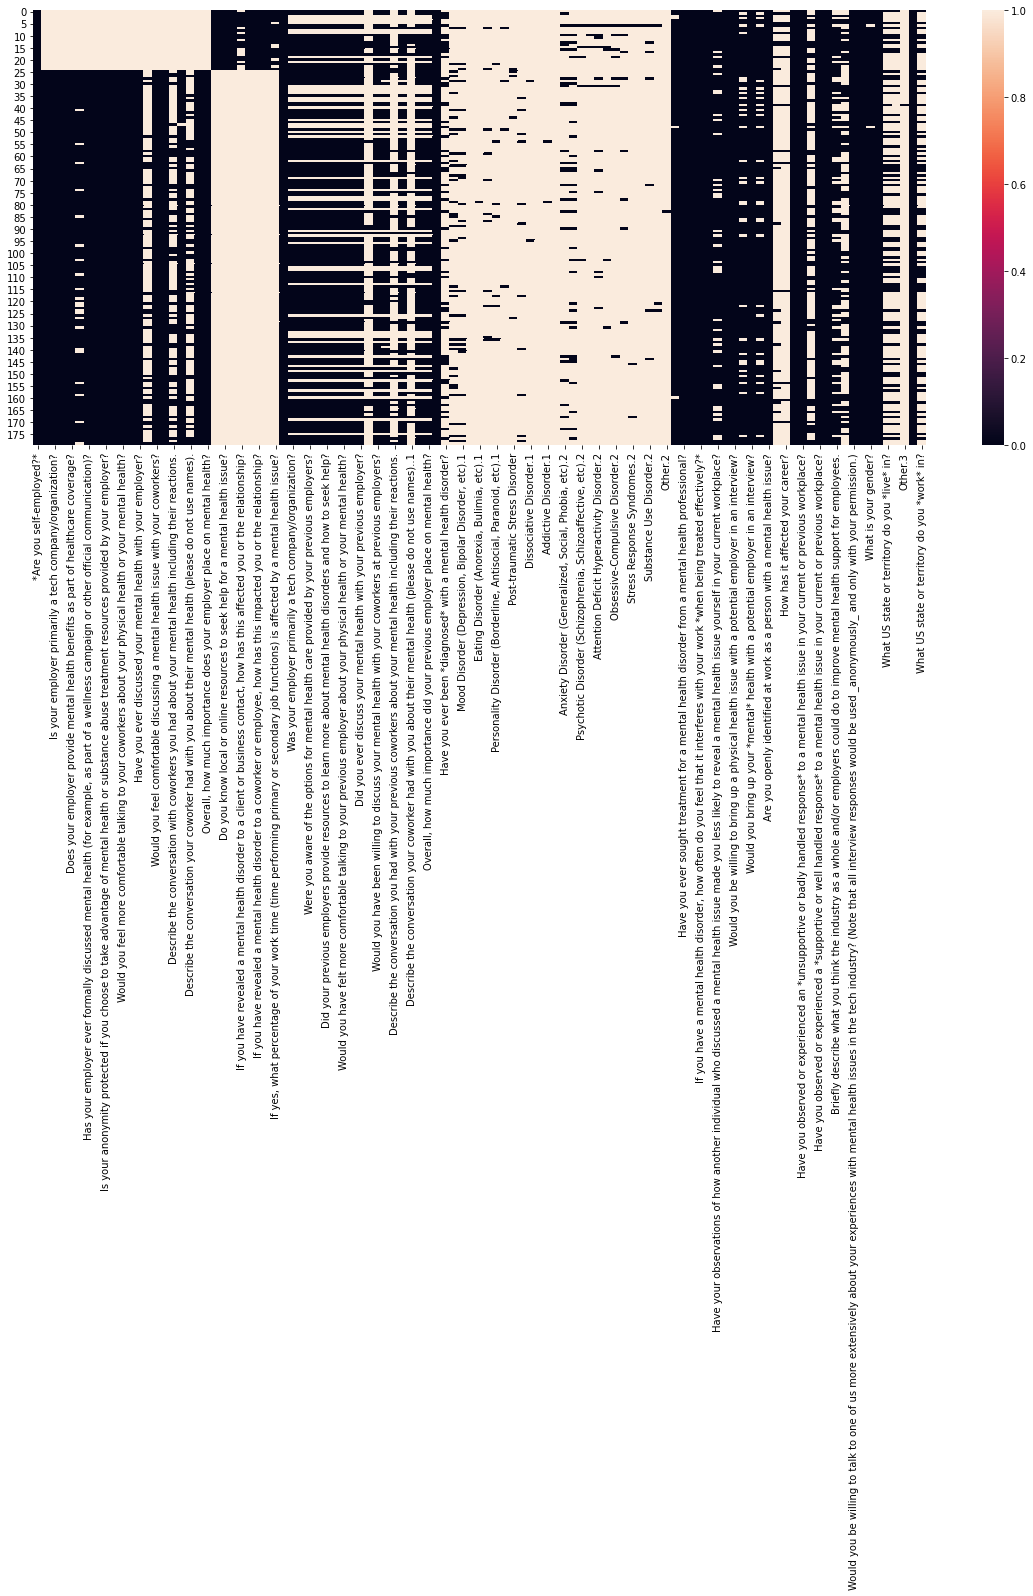

In [9]:
#Missing values visualizatin
plt.figure(figsize=(20, 8))
sns.heatmap(data = surveyC.isna());

- Change column titles

In [10]:
#Change column names for easier use
surveyC.rename(columns = {"*Are you self-employed?*":"self_employed",
                          "How many employees does your company or organization have?":"num_employees",
                          "Is your employer primarily a tech company/organization?":"is_tech_company",
                          "Is your primary role within your company related to tech/IT?":"is_role_in_tech",
                          "Does your employer provide mental health benefits as part of healthcare coverage?":"employer_mh_coverage",
                          "Do you know the options for mental health care available under your employer-provided health coverage?":"employer_options_in_mh_coverage",
                          "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?":"employer_mh_disc",
                          "Does your employer offer resources to learn more about mental health disorders and options for seeking help?":"employer_offer_mh_res",
                          "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?":"employer_mh_sa_anonimity",
                          "If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?":"employer_mh_leave_difficulty",
                          "Would you feel more comfortable talking to your coworkers about your physical health or your mental health?":"coworker_comfort_reveal_ph_mh_disc",
                          "Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?":"supervisor_comfort_mh_disc",
                          "Have you ever discussed your mental health with your employer?":"employer_reveal_mh_disc",
                          "Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.":"employer_reveal_mh_desc_results",
                          "Would you feel comfortable discussing a mental health issue with your coworkers?":"coworker_comfort_mh_disc",
                          "Have you ever discussed your mental health with coworkers?":"coworker_reveal_mh_disc",
                          "Describe the conversation with coworkers you had about your mental health including their reactions.":"coworker_reveal_mh_disc_results",
                          "Have you ever had a coworker discuss their or another coworker's mental health with you?":"coworker_confine_mh_disc",
                          "Describe the conversation your coworker had with you about their mental health (please do not use names).":"coworker_confine_mh_desc",
                          "Overall, how much importance does your employer place on physical health?":"employer_ph_importance",
                          "Overall, how much importance does your employer place on mental health?":"employer_mh_importance",
                          "Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?":"personal_mh_coverge",
                          "Do you know local or online resources to seek help for a mental health issue?":"personal_mh_res",
                          "If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?":"self_employed_mh_reveal_to_clients",
                          "If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?":"self_employed_mh_reveal_to_clients_outcome",
                          "If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?":"self_employed_to_employee_employed_to_coworker_mh_reveal",
                          "If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?":"self_employed_to_employee_employed_to_coworker_mh_reveal_outcome",
                          "Do you believe your productivity is ever affected by a mental health issue?":"mh_prodcutivity_impact",
                          "If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?":"mh_productivity_impact_perc",
                          "*Do you have previous employers?*":"prev_employer",
                          "Was your employer primarily a tech company/organization?":"prev_employer_is_tech_company",
                          "Have your previous employers provided mental health benefits?":"prev_employer_mh_coverage",
                          "Were you aware of the options for mental health care provided by your previous employers?":"prev_employer_options_in_mh_coverage",
                          "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?":"prev_employer_mh_disc",
                          "Did your previous employers provide resources to learn more about mental health disorders and how to seek help?":"prev_employer_offer_mh_res",
                          "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?":"prev_employer_mh_sa_anonimity",
                          "Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?":"prev_employer_comfort_reveal_ph_mh_disc",
                          "Would you have been willing to discuss your mental health with your direct supervisor(s)?":"prev_supervisor_comfort_mh_disc",
                          "Did you ever discuss your mental health with your previous employer?":"prev_employer_reveal_mh_disc",
                          "Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.":"prev_employer_reveal_mh_desc_results",
                          "Would you have been willing to discuss your mental health with your coworkers at previous employers?":"prev_coworker_comfort_mh_disc",
                          "Did you ever discuss your mental health with a previous coworker(s)?":"prev_coworker_mh_desc",
                          "Describe the conversation you had with your previous coworkers about your mental health including their reactions.":"prev_coworker_reveal_mh_desc",
                          "Did you ever have a previous coworker discuss their or another coworker's mental health with you?":"prev_coworker_confine_mh_disc",
                          "Describe the conversation your coworker had with you about their mental health (please do not use names)..1":"prev_coworker_confine_mh_desc",
                          "Overall, how much importance did your previous employer place on physical health?":"prev_employer_ph_importance",
                          "Overall, how much importance did your previous employer place on mental health?":"prev_employer_mh_importance",
                          "Do you *currently* have a mental health disorder?":"currently_have_mh",
                          "Have you ever been *diagnosed* with a mental health disorder?":"diagnosed_mh",
                          "Post-traumatic Stress Disorder.1":"Post-traumatic Stress Disorder.2",
                          "Post-traumatic Stress Disorder":"Post-traumatic Stress Disorder.1",
                          "Have you had a mental health disorder in the past?":"past_mh",
                          "Have you ever sought treatment for a mental health disorder from a mental health professional?":"past_mh_prof_treatment",
                          "Do you have a family history of mental illness?":"mh_family_history",
                          "If you have a mental health disorder, how often do you feel that it interferes with your work *when being treated effectively?*":"mh_with_treatment_impact_on_work",
                          "If you have a mental health disorder, how often do you feel that it interferes with your work *when* _*NOT*_* being treated effectively (i.e., when you are experiencing symptoms)?*":"mh_with_no_treatment_impact_on_work",
                          "Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?":"others_mh_reveal_impact_on_mh_self_reveal",
                          "How willing would you be to share with friends and family that you have a mental illness?":"friends_fam_mh_reveal",
                          "Would you be willing to bring up a physical health issue with a potential employer in an interview?":"future_employer_ph_reveal",
                          "Why or why not?":"future_employer_ph_reveal_disc",
                          "Would you bring up your *mental* health with a potential employer in an interview?":"future_employer_mh_reveal",
                          "Why or why not?.1":"future_employer_mh_reveal_disc",
                          "Are you openly identified at work as a person with a mental health issue?":"identified_mh_at_work",
                          "Has being identified as a person with a mental health issue affected your career?":"identified_mh_at_work_has_effected",
                          "How has it affected your career?":"identified_mh_at_work_how_effected",
                          "If they knew you suffered from a mental health disorder, how do you think that your team members/co-workers would react?":"if_coworker_knew_of_my_mh_results",
                          "Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?":"mh_bad_response_at_work",
                          "Describe the circumstances of the badly handled or unsupportive response.":"mh_negative_response_at_work_desc",
                          "Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?":"mh_positive_response_at_work_desc",
                          "Overall, how well do you think the tech industry supports employees with mental health issues?":"tech_industry_mh_support",
                          "Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.":"advice_to_tech_industry_mh_support",
                          "If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.":"extra_mh_points_beyond_survey",
                          "Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.)":"survey_creators_comfort_reveal",
                          "What is your age?":"age",
                          "What is your gender?":"gender",
                          "What country do you *live* in?":"country_live",
                          "What US state or territory do you *live* in?":"us_state_live",
                          "What is your race?":"race",
                          "What country do you *work* in?":"country_work",
                          "What US state or territory do you *work* in?":"us_state_work",
                         },
               inplace=True)

##### Find countries column

Lets plot the countries to have a better understanding

https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values/51535326#51535326

In [11]:
user_country = surveyC["country_live"].value_counts()

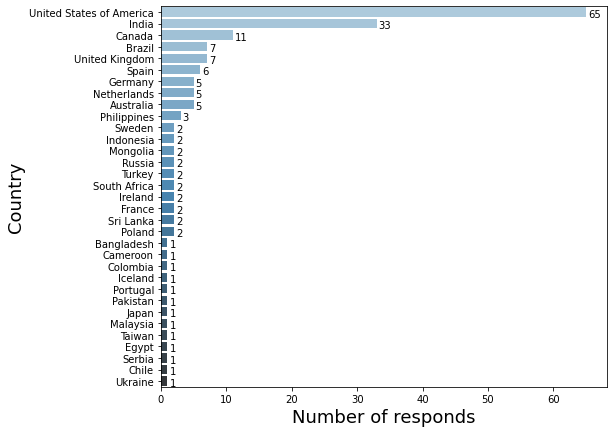

In [12]:
plt.figure(figsize=(8, 7))
sns_country = sns.barplot(x=user_country.values, y=user_country.index, palette=("Blues_d"))
plt.xlabel("Number of responds", fontsize=18)
plt.ylabel("Country", fontsize=18)

def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(sns_country, "h", 0.3)

## Data cleaning and visualzing

- Change and "num_employees" column

In [22]:
surveyC["num_employees"].value_counts()

More than 1000    72
26-100            28
100-500           24
500-1000          20
6-25              10
1-5                1
Name: num_employees, dtype: int64

In [24]:
#Change "01-May", "Jun-25", NaN
surveyC["num_employees"].replace(to_replace="01-May", value="1-5", inplace=True)
surveyC["num_employees"].replace(to_replace="Jun-25", value="6-25", inplace=True)
#surveyC["num_employees"].fillna(0)

In [23]:
surveyC[["num_employees"]]

num_employees
0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
5               NaN
6               NaN
7               NaN
8               NaN
9               NaN
10              NaN
11              NaN
12              NaN
13              NaN
14              NaN
15              NaN
16              NaN
17              NaN
18              NaN
19              NaN
20              NaN
21              NaN
22              NaN
23              NaN
24              NaN
25   More than 1000
26         500-1000
27             6-25
28           26-100
29         500-1000
30   More than 1000
31   More than 1000
32   More than 1000
33           26-100
34   More than 1000
35   More than 1000
36   More than 1000
37   More than 1000
38          100-500
39   More than 1000
40           26-100
41           26-100
42   More than 1000
43   More than 1000
44          100-500
45   More than 1000
46         500-1000
47          100-500
48         500-1000
49          100-500
50           26-100
51   More than 1000
52             6-25
53          100-500
54   More than 1000
55   More than 1000
56         500-1000
57          100-500
58          100-500
59          100-500
60         500-1000
61           26-100
62   More than 1000
63             6-25
64             6-25
65           26-100
66          100-500
67         500-1000
68           26-100
69           26-100
70   More than 1000
71             6-25
72   More than 1000
73   More than 1000
74   More than 1000
75          100-500
76   More than 1000
77   More than 1000
78   More than 1000
79          100-500
80   More than 1000
81           26-100
82   More than 1000
83   More than 1000
84   More than 1000
85             6-25
86           26-100
87         500-1000
88   More than 1000
89   More than 1000
90          100-500
91         500-1000
92          100-500
93          100-500
94         500-1000
95   More than 1000
96   More than 1000
97   More than 1000
98           26-100
99          100-500
100  More than 1000
101        500-1000
102          26-100
103            6-25
104         100-500
105          26-100
106  More than 1000
107  More than 1000
108          26-100
109  More than 1000
110          26-100
111  More than 1000
112  More than 1000
113        500-1000
114          26-100
115        500-1000
116  More than 1000
117  More than 1000
118  More than 1000
119  More than 1000
120        500-1000
121  More than 1000
122          26-100
123  More than 1000
124            6-25
125          26-100
126  More than 1000
127            6-25
128         100-500
129  More than 1000
130         100-500
131         100-500
132          26-100
133  More than 1000
134         100-500
135  More than 1000
136  More than 1000
137         100-500
138  More than 1000
139  More than 1000
140            6-25
141        500-1000
142  More than 1000
143  More than 1000
144        500-1000
145         100-500
146  More than 1000
147  More than 1000
148          26-100
149  More than 1000
150  More than 1000
151  More than 1000
152  More than 1000
153        500-1000
154          26-100
155  More than 1000
156  More than 1000
157          26-100
158          26-100
159  More than 1000
160  More than 1000
161             1-5
162  More than 1000
163          26-100
164  More than 1000
165  More than 1000
166         100-500
167  More than 1000
168          26-100
169  More than 1000
170  More than 1000
171  More than 1000
172        500-1000
173          26-100
174  More than 1000
175  More than 1000
176          26-100
177         100-500
178        500-1000
179        500-1000

In [13]:
#For column "If possibly, what disorder(s) do you believe you have?", 
#"Anxiety Disorder (Generalized, Social, Phobia, etc).1"
#needs to be 74.5%

mh1 = surveyC["Anxiety Disorder (Generalized, Social, Phobia, etc).1"]
mh2 = surveyC["Anxiety Disorder (Generalized, Social, Phobia, etc).2"]
print(mh1, mh2)

##For column "If so, what disorder(s) were you diagnosed with?", 
#"Anxiety Disorder (Generalized, Social, Phobia, etc).2"
#needs to be 55.3%

0                                                    NaN
1                                                    NaN
2                                                    NaN
3                                                    NaN
4                                                    NaN
5                                                    NaN
6                                                    NaN
7      Anxiety Disorder (Generalized, Social, Phobia,...
8                                                    NaN
9                                                    NaN
10                                                   NaN
11                                                   NaN
12                                                   NaN
13                                                   NaN
14                                                   NaN
15                                                   NaN
16                                                   NaN
17                             

In [14]:
#Check number of unique values for each object type column, Will help us know how to encode
{column: len((surveyC[column]).unique()) for column in surveyC.select_dtypes("object").columns}

{'num_employees': 7,
 'employer_mh_coverage': 5,
 'employer_options_in_mh_coverage': 3,
 'employer_mh_disc': 4,
 'employer_offer_mh_res': 4,
 'employer_mh_sa_anonimity': 4,
 'employer_mh_leave_difficulty': 7,
 'coworker_comfort_reveal_ph_mh_disc': 4,
 'supervisor_comfort_mh_disc': 4,
 'employer_reveal_mh_desc_results': 35,
 'coworker_comfort_mh_disc': 4,
 'coworker_reveal_mh_disc_results': 54,
 'coworker_confine_mh_desc': 51,
 'personal_mh_res': 4,
 'self_employed_mh_reveal_to_clients': 6,
 'self_employed_mh_reveal_to_clients_outcome': 5,
 'self_employed_to_employee_employed_to_coworker_mh_reveal': 6,
 'self_employed_to_employee_employed_to_coworker_mh_reveal_outcome': 6,
 'mh_prodcutivity_impact': 4,
 'mh_productivity_impact_perc': 5,
 'prev_employer_mh_coverage': 5,
 'prev_employer_options_in_mh_coverage': 6,
 'prev_employer_mh_disc': 5,
 'prev_employer_offer_mh_res': 4,
 'prev_employer_mh_sa_anonimity': 5,
 'prev_employer_comfort_reveal_ph_mh_disc': 4,
 'prev_supervisor_comfort_mh_d

In [15]:
#Check unique values for each object type column, Will help us know how to encode
{column: list(surveyC[column].unique()) for column in surveyC.select_dtypes("object").columns}

{'num_employees': [nan,
  'More than 1000',
  '500-1000',
  'Jun-25',
  '26-100',
  '100-500',
  '01-May'],
 'employer_mh_coverage': [nan,
  'Yes',
  'No',
  "I don't know",
  'Not eligible for coverage / NA'],
 'employer_options_in_mh_coverage': [nan, 'No', 'Yes'],
 'employer_mh_disc': [nan, 'Yes', "I don't know", 'No'],
 'employer_offer_mh_res': [nan, 'Yes', 'No', "I don't know"],
 'employer_mh_sa_anonimity': [nan, "I don't know", 'Yes', 'No'],
 'employer_mh_leave_difficulty': [nan,
  'Very easy',
  'Somewhat easy',
  'Difficult',
  'Neither easy nor difficult',
  'Somewhat difficult',
  "I don't know"],
 'coworker_comfort_reveal_ph_mh_disc': [nan,
  'Physical health',
  'Mental health',
  'Same level of comfort for each'],
 'supervisor_comfort_mh_disc': [nan, 'Yes', 'Maybe', 'No'],
 'employer_reveal_mh_desc_results': [nan,
  'discussed anxiety disorder and desire to WFH more \nfrequently. they honored this request with no problem.',
  'awkwardness',
  'I had to take leave for severa

- Change and encode mental health disorders

In [16]:
#We saw that there was a disorder that wasn't accounted for (stated in "Ither"): Autism Spectrum Disorder
#Change columns: "Other.1" and "Other.2" to "Autism Spectrum Disorder.1" and "Autism Spectrum Disorder.2" respectively
surveyC.rename(columns={
    "Other.1":"Autism Spectrum Disorder.1",
    "Other.2":"Autism Spectrum Disorder.2"},
               inplace=True
              )

In [17]:
mh_list = [
    "Anxiety Disorder (Generalized, Social, Phobia, etc).1",
    "Mood Disorder (Depression, Bipolar Disorder, etc).1",
    "Psychotic Disorder (Schizophrenia, Schizoaffective, etc).1",
    "Eating Disorder (Anorexia, Bulimia, etc).1",
    "Attention Deficit Hyperactivity Disorder.1",
    "Personality Disorder (Borderline, Antisocial, Paranoid, etc).1",
    "Obsessive-Compulsive Disorder.1",
    "Post-traumatic Stress Disorder.1",
    "Stress Response Syndromes.1",
    "Dissociative Disorder.1",
    "Substance Use Disorder.1",
    "Addictive Disorder.1",
    "Autism Spectrum Disorder.1", 
    "Anxiety Disorder (Generalized, Social, Phobia, etc).2",
    "Mood Disorder (Depression, Bipolar Disorder, etc).2",
    "Psychotic Disorder (Schizophrenia, Schizoaffective, etc).2",
    "Eating Disorder (Anorexia, Bulimia, etc).2",
    "Attention Deficit Hyperactivity Disorder.2",
    "Personality Disorder (Borderline, Antisocial, Paranoid, etc).2",
    "Obsessive-Compulsive Disorder.2",
    "Post-traumatic Stress Disorder.2",
    "Stress Response Syndromes.2",
    "Dissociative Disorder.2",
    "Substance Use Disorder.2",
    "Addictive Disorder.2",
    "Autism Spectrum Disorder.2"
]

for i in range(len(mh_list)):
    surveyC[[mh_list[i]]] = surveyC[[mh_list[i]]].applymap(lambda x: 0 if pd.isnull(x) else 1)

- Change and encode gender column 

In [18]:
#Make all values to lowercase and see the unique values
#surveyC["gender"].uniqe()
surveyC["gender"] = surveyC["gender"].str.lower()

In [19]:
#Categorize gender into: male, female, other
male_str = ["male", "mail", "m", "mostyl male", "mostly male", "cisgender male"]
fmale_str = ["female", "f", "woman", "she/her", "female, she/her"]

#Iterate through dataset and change the values
for (row, column) in surveyC.iterrows():
    if column["gender"] in male_str:
        surveyC["gender"].replace(to_replace=column["gender"],
                                              value=1, inplace=True)
    elif column["gender"] in fmale_str:
        surveyC["gender"].replace(to_replace=column["gender"],
                                               value=2, inplace=True)
    else: 
        surveyC["gender"].fillna(3, inplace=True)

In [20]:
surveyC["gender"].value_counts()

1    116
2     62
3      2
Name: gender, dtype: int64

In [21]:
#Example of a scenario to do a for loop, Series has a property of value_counts
#print(surveyC["What is your gender?"].value_counts().male)
#print(surveyC["What is your gender?"].value_counts().female)
#def count_str_occurences(df, column, values=[]):
#    total_instances = 0
#    if len(values) == 0 or None:
#        print("Please insert string values for 'values' in the following manner: values=['val1', 'val2']")
#    else:
#        for i in range(len(values)):
#            total_instances += df[column].value_counts().values[i]
#            print("For '{}', there's {} instances".format(values[i], df[column].value_counts().values[i]))
#    print("-"*20)
#    print("Total instances:", total_instances)
            
#count_str_occurences(surveyC, "gender", values=['male', 'female', 'other'])

In [22]:
#Plot age and gender in each country
#plt.figure(figsize=(12, 8))
#x = sns.barplot(x="country_live",
#                y="age",
#                hue="gender",
#                data=surveyC)

#If x and y axes are shifted
#for item in x.get_xticklabels():
#    item.set_rotation(90)

- race

In [23]:
#Change NaN to "I prefer not to answer"
surveyC["race"].fillna("I prefer not to answer", inplace=True)

In [24]:
#Check which user inserted Latino, there should be a race column 
surveyC.loc[surveyC["Other.3"] == "Latino "] #Gets more information about the user

self_employed   num_employees  is_tech_company  is_role_in_tech  \
39              0  More than 1000              1.0              1.0   

   employer_mh_coverage employer_options_in_mh_coverage employer_mh_disc  \
39                  Yes                             Yes              Yes   

   employer_offer_mh_res employer_mh_sa_anonimity  \
39                   Yes             I don't know   

   employer_mh_leave_difficulty coworker_comfort_reveal_ph_mh_disc  \
39                Somewhat easy                    Physical health   

   supervisor_comfort_mh_disc  employer_reveal_mh_disc  \
39                        Yes                      1.0   

   employer_reveal_mh_desc_results coworker_comfort_mh_disc  \
39                             NaN                    Maybe   

    coworker_reveal_mh_disc coworker_reveal_mh_disc_results  \
39                      1.0                             NaN   

    coworker_confine_mh_disc coworker_confine_mh_desc  employer_ph_importance  \
39                       1.0                      NaN                     8.0   

    employer_mh_importance  personal_mh_coverge personal_mh_res  \
39                     7.0                  NaN             NaN   

   self_employed_mh_reveal_to_clients  \
39                                NaN   

   self_employed_mh_reveal_to_clients_outcome  \
39                                        NaN   

   self_employed_to_employee_employed_to_coworker_mh_reveal  \
39                                                NaN         

   self_employed_to_employee_employed_to_coworker_mh_reveal_outcome  \
39                                                NaN                 

   mh_prodcutivity_impact mh_productivity_impact_perc  prev_employer  \
39                    NaN                         NaN              1   

    prev_employer_is_tech_company prev_employer_mh_coverage  \
39                            0.0              No, none did   

   prev_employer_options_in_mh_coverage prev_employer_mh_disc  \
39                   N/A (none offered)              None did   

   prev_employer_offer_mh_res prev_employer_mh_sa_anonimity  \
39                   None did                  I don't know   

   prev_employer_comfort_reveal_ph_mh_disc  prev_supervisor_comfort_mh_disc  \
39                         Physical health  Some of my previous supervisors   

    prev_employer_reveal_mh_disc prev_employer_reveal_mh_desc_results  \
39                           0.0                                  NaN   

       prev_coworker_comfort_mh_disc  prev_coworker_mh_desc  \
39  At some of my previous employers                    1.0   

   prev_coworker_reveal_mh_desc  prev_coworker_confine_mh_disc  \
39                          NaN                            0.0   

   prev_coworker_confine_mh_desc  prev_employer_ph_importance  \
39                           NaN                          7.0   

    prev_employer_mh_importance currently_have_mh diagnosed_mh  \
39                          5.0               Yes          Yes   

    Anxiety Disorder (Generalized, Social, Phobia, etc).1  \
39                                                  0       

    Mood Disorder (Depression, Bipolar Disorder, etc).1  \
39                                                  0     

    Psychotic Disorder (Schizophrenia, Schizoaffective, etc).1  \
39                                                  0            

    Eating Disorder (Anorexia, Bulimia, etc).1  \
39                                           0   

    Attention Deficit Hyperactivity Disorder.1  \
39                                           0   

    Personality Disorder (Borderline, Antisocial, Paranoid, etc).1  \
39                                                  0                

    Obsessive-Compulsive Disorder.1  Post-traumatic Stress Disorder.1  \
39                                0                                 0   

    Stress Response Syndromes.1  Dissociative Disorder.1  \
39                            0                       

In [25]:
#Fill in "Latino" value for user 39 in race column
surveyC.loc[[39], "race"] = "Latino"

In [26]:
#Drop "Other.3" column
surveyC = surveyC.drop("Other.3", axis=1)

## Encoding data

## Answering questions

- Are people who are self imployed have more mental disorders?

In [27]:
#Have a look at the values and dtype
surveyC["self_employed"].value_counts()

#How do we know what is yes or no? Assuming we don't have access to the ones 
#that made the survey, we can infer by looking at the column "How many employees does your company or organization have?"
#If they didn't put any value, it means that they're most likely self employed
#Thus, 1 = yes, 0 = no
#num_na = surveyC["How many employees does your company or organization have?"].isna().sum()
#num_na

#Check answers
surveyC["currently_have_mh"].value_counts()

No            58
Yes           51
Possibly      47
Don't Know    24
Name: currently_have_mh, dtype: int64

In [28]:
#Save the copy
#surveyC.to_csv("Dataset/Mental_Health_in_Tech_2020_OSMI-COPY.csv:)